**The dataset**

---



I used the teams statistics dataset collected and created by Swaptr. It contains game statistics of all the teams competing at the FIFA World Cup Qatar 2022. Each row in the data represents a country and each column is a game statistics. This dataset has 32 rows and 189 columns.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

team_data = pd.read_csv('team_data.csv')

print(team_data.shape)

team_data.head()

(32, 189)


,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


**Players' Age**

---



In [ ]:
team_data['avg_age'].describe()

,avg_age
count,32.000000
mean,28.062500
std,1.166674
min,25.400000
25%,27.475000
50%,28.100000
75%,28.725000
max,30.600000


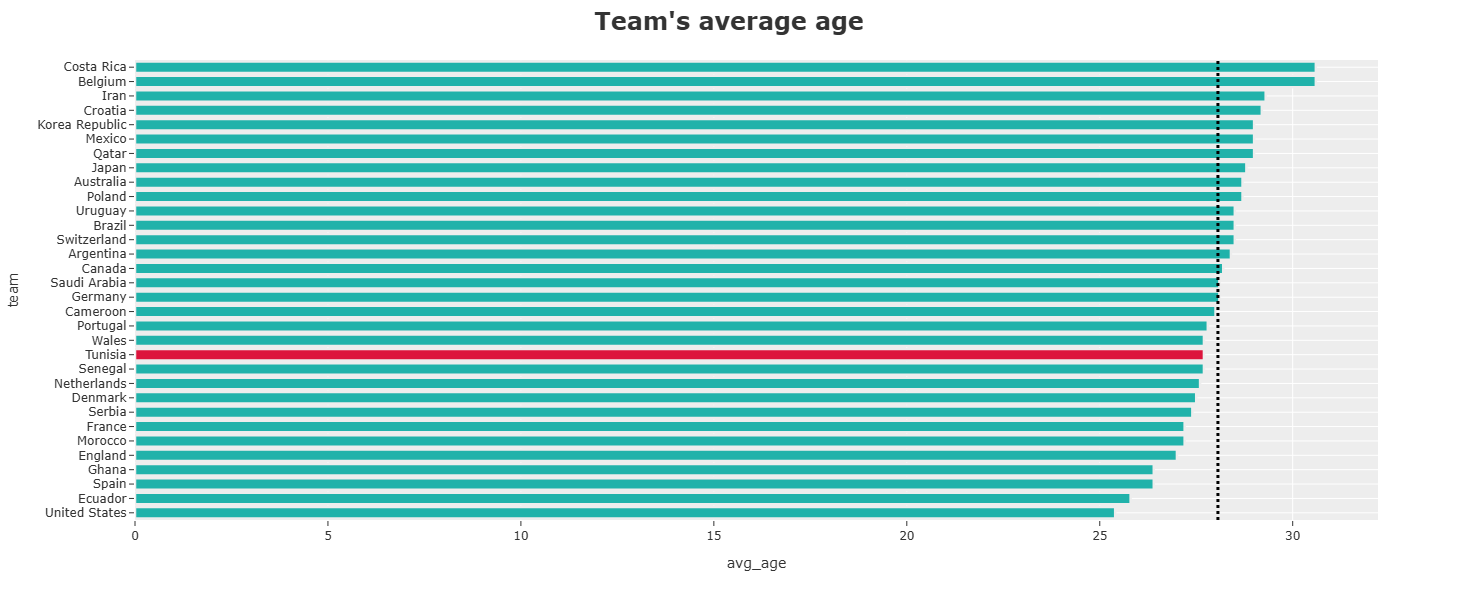

In [ ]:
import numpy as np
import plotly.express as px

fig = px.bar(
    team_data.sort_values('avg_age', ascending=True),
    y="team", x="avg_age",
    width=750,
    height=600,
)

fig.update_layout(
    template='ggplot2',
    title_text="<b>Team's average age</b>",
    title_font=dict(size=24),
)

age_avg = np.mean(team_data['avg_age'])

fig.add_shape(
    type="line",
    line_color="black", line_width=3, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper",
    x0=age_avg, x1=age_avg, xref="x"
)

# Make sure length of colors matches number of bars:
n_teams = team_data.shape[0]
colors = ['lightseagreen'] * n_teams
if n_teams > 11:
    colors[11] = 'crimson'   # highlight one team

fig.update_traces(
    marker_color=colors,
    marker_line_color=None,
    marker_line_width=2.5,
)

fig.show()

**Number of Players Involved**

---



In [ ]:
team_data['players_used'].describe()

,players_used
count,32.000000
mean,21.250000
std,1.951013
min,18.000000
25%,20.000000
50%,21.000000
75%,22.000000
max,26.000000


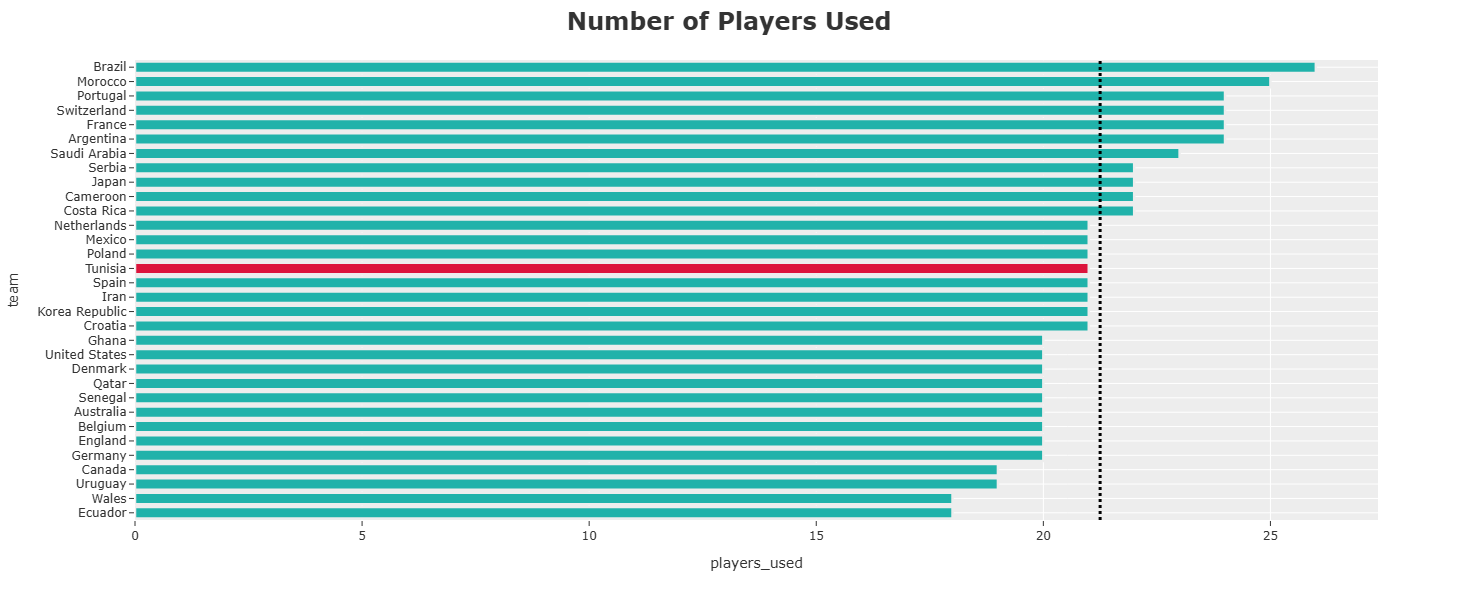

In [ ]:
import numpy as np
import plotly.express as px

fig = px.bar(
    team_data.sort_values('players_used', ascending=True),
    y="team",
    x="players_used",
    color=None,
    width=750,
    height=600,
)

fig.update_layout(
    template='ggplot2',
    title_text="<b>Number of Players Used</b>",   # use title_text
    title_font=dict(size=24),                    # new style: title_font
)

players_avg = np.mean(team_data['players_used'])

fig.add_shape(
    type="line",
    line_color="black",
    line_width=3,
    opacity=1,
    line_dash="dot",
    y0=0,
    y1=1,
    yref="paper",
    x0=players_avg,
    x1=players_avg,
    xref="x",
)

# Make sure this matches number of bars
n_teams = team_data.shape[0]
colors = ['lightseagreen'] * n_teams
if n_teams > 17:
    colors[17] = 'crimson'

fig.update_traces(
    marker_color=colors,
    marker_line_color=None,
    marker_line_width=2.5,
)

fig.show()

On average each team has used 21 players

Brazil has used the highest number of players with 26

The fewest number of players used is 18 Wales and Ecuador

**Goals and xG's (Expected goals)**

---
Expected goals (xG) calculates how many goals a team should have scored based on the quality of the chances created. It is a more accurate and fairer assessment than shots on targets

In an ideal scenario xG is equal to goals, teams/players score the chances they are expected to convert. However, we do not live in an ideal world and that doesn't happen all the time. Higher xG's than scored goals implies wastefulness. The opposite however may suggest that teams/players were more prolific than expected. Of course (as always) there are exceptions to this assumption such as expected errors, extraordinary defense/goalkeeping, a genius of a strike etc.


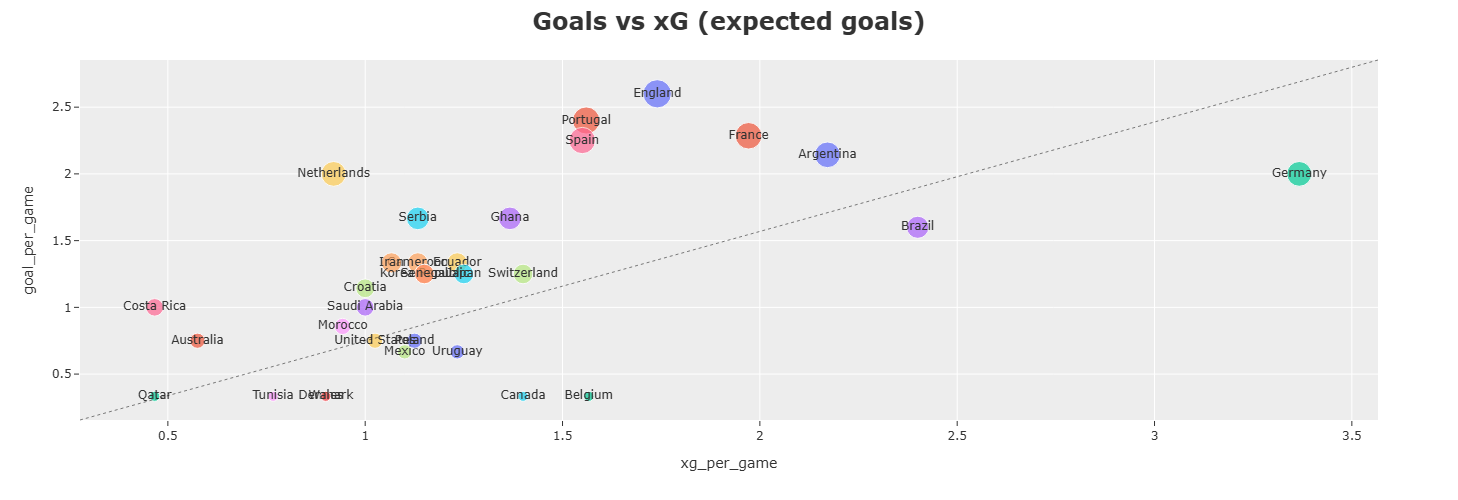

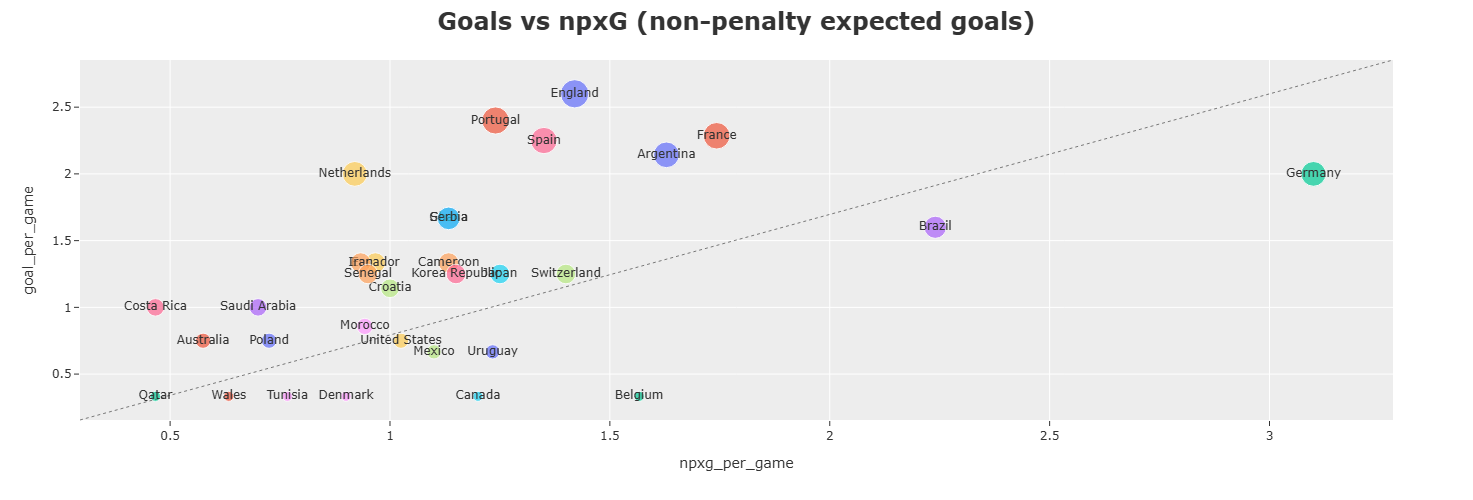

In [ ]:
team_data['goal_per_game'] = team_data['goals'] / team_data['games']
team_data['xg_per_game'] = team_data['xg'] / team_data['games']
team_data['npxg_per_game'] = team_data['npxg'] / team_data['games']

# -------- 1) Goals vs xG --------
fig = px.scatter(
    team_data,
    y='goal_per_game',
    x='xg_per_game',
    color='team',
    size='goal_per_game',
    width=850,
    height=500,
    text=team_data['team'],
)

fig.add_shape(
    type="line",
    line_color="black",
    line_width=0.5,
    opacity=1,
    line_dash="dot",
    y0=0, y1=1, yref="paper",
    x0=0, x1=1, xref="paper",
)

fig.update_layout(
    showlegend=False,
    template='ggplot2',
    title_text='<b>Goals vs xG (expected goals)</b>',  # use title_text
    title_font=dict(size=24),                          # use title_font
)

fig.show()

# -------- 2) Goals vs npxG --------
fig = px.scatter(
    team_data,
    y='goal_per_game',
    x='npxg_per_game',
    color='team',
    size='goal_per_game',
    width=850,
    height=500,
    text=team_data['team'],
)

fig.add_shape(
    type="line",
    line_color="black",
    line_width=0.5,
    opacity=1,
    line_dash="dot",
    y0=0, y1=1, yref="paper",
    x0=0, x1=1, xref="paper",
)

fig.update_layout(
    showlegend=False,
    template='ggplot2',
    title_text='<b>Goals vs npxG (non-penalty expected goals)</b>',
    title_font=dict(size=24),
)

fig.show()

We observe the following from the data

*  Germany has the highest xG with 3.35 per game. But the could only convert 2 of them. Meaning they were the most wasetfull of the teams
*   all the teams below the dotted line (higher xG than goals) only Brazil made it out of the group stage.





**Shots on Target**

---
A shot on target is defined as any goal attempt that:

Goes into the net regardless of intent – For Goals only.
Is a clear attempt to score that would have gone into the net but for being saved by the goalkeeper or is stopped by a player who is the last-man with the goalkeeper having no chance of preventing the goal (last line block).
Shots directly hitting the frame of the goal are not counted as shots on target, unless the ball goes in and is awarded as a goal.Shots blocked by another player, who is not the last-man, are not counted as shots on target.


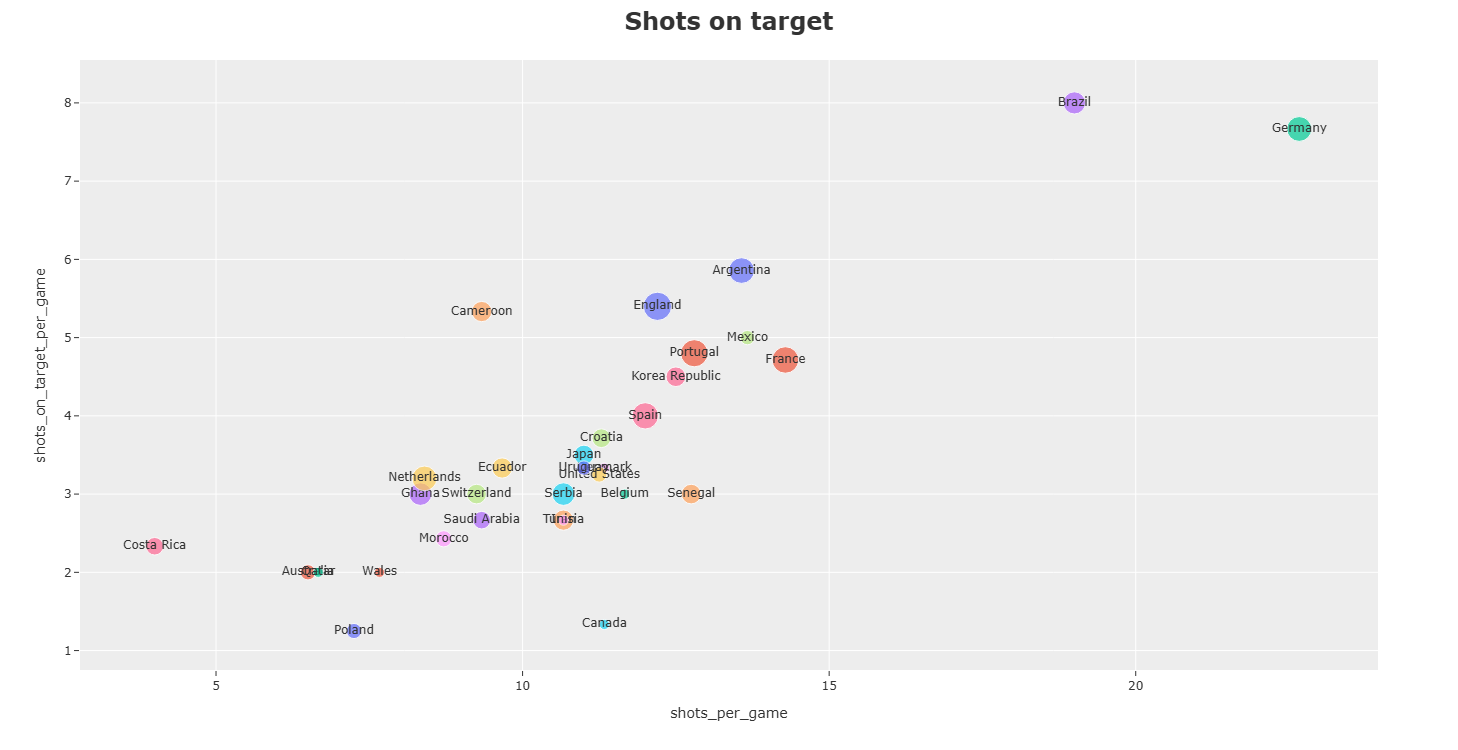

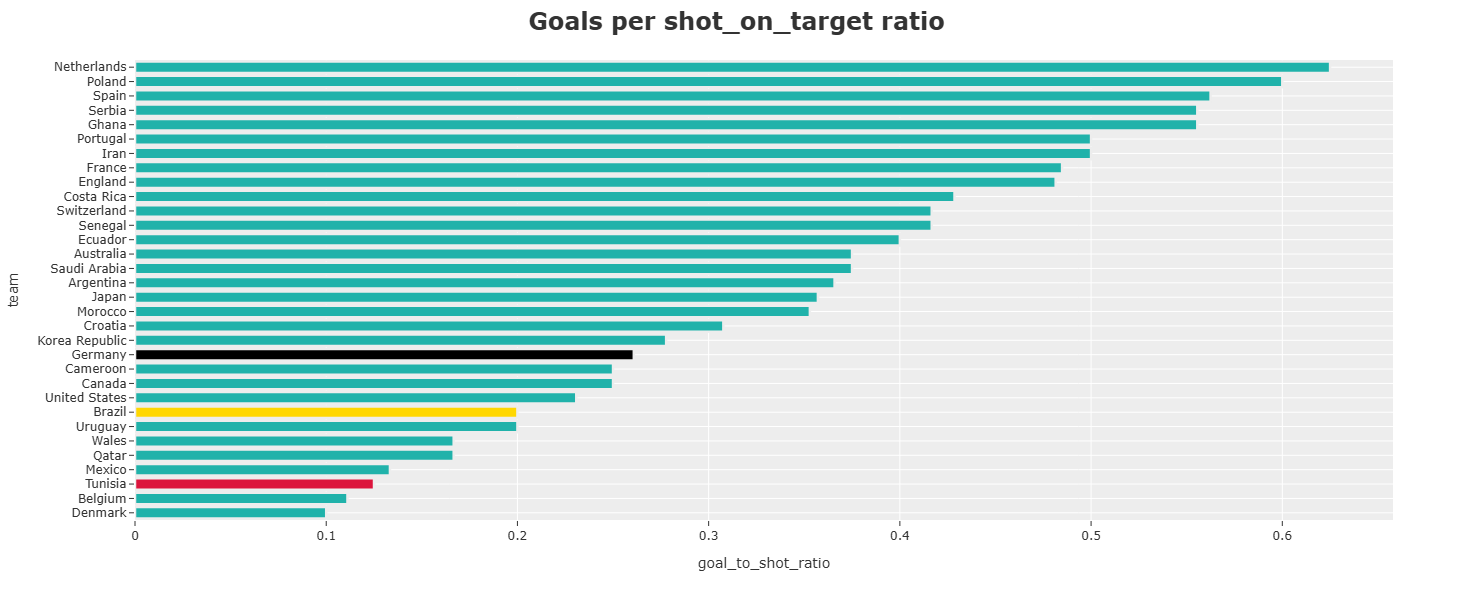

In [ ]:
team_data['shots_per_game'] = team_data['shots'] / team_data['games']
team_data['shots_on_target_per_game'] = team_data['shots_on_target'] / team_data['games']
team_data['npxg_per_game'] = team_data['npxg'] / team_data['games']

fig = px.scatter(
    team_data,
    x='shots_per_game',
    y='shots_on_target_per_game',
    color='team',
    size='goal_per_game',
    width=850,
    height=750,
    text=team_data['team'],
)

fig.update_layout(
    showlegend=False,
    template='ggplot2',
    title_text='<b>Shots on target</b>',   # use title_text
    title_font=dict(size=24),             # use title_font, NOT titlefont
)

fig.show()
# goals to shots ratio
team_data['goal_to_shot_ratio'] = (
    team_data['goal_per_game'] / team_data['shots_on_target_per_game']
)

fig = px.bar(
    team_data.sort_values('goal_to_shot_ratio', ascending=True),
    y="team",
    x='goal_to_shot_ratio',
    color=None,
    width=750,
    height=600,
)

fig.update_layout(
    template='ggplot2',
    title_text="<b>Goals per shot_on_target ratio</b>",
    title_font=dict(size=24),
)


n_teams = team_data.shape[0]
colors = ['lightseagreen'] * n_teams
if n_teams > 2:
    colors[2] = 'crimson'
if n_teams > 11:
    colors[11] = 'black'
if n_teams > 7:
    colors[7] = 'gold'

fig.update_traces(
    marker_color=colors,
    marker_line_color=None,
    marker_line_width=2.5,
)

fig.show()


The most notable observation is that Germany under-performed in this tournament. Although they are leading the pack with total shots_per_game and shot_on_target_per_game, they are 12th from the bottom in goal conversion rate.

The Netherlands had the highest goal per shot_on_target ratio.

**Possessions_Passes_Dribbles**

---


1.   Possessions: One or more sequences in a row belonging to the same team. A possession is ended by the opposition gaining control of the ball.

2.  Pass: Any intentionally played ball from one player to another. Passes include open play passes, goal kicks, corners and free kicks played as pass – but exclude crosses, keeper throws and throw-ins.
3.   Progressive pass: A forward pass that attempts to advance a team significantly closer to the opponent’s goal


4.  Bribbles: An attempt by a player to beat an opponent when they have possession of the ball. A successful dribble means the player beats the defender while retaining possession, unsuccessful ones are where the dribbler is tackled.




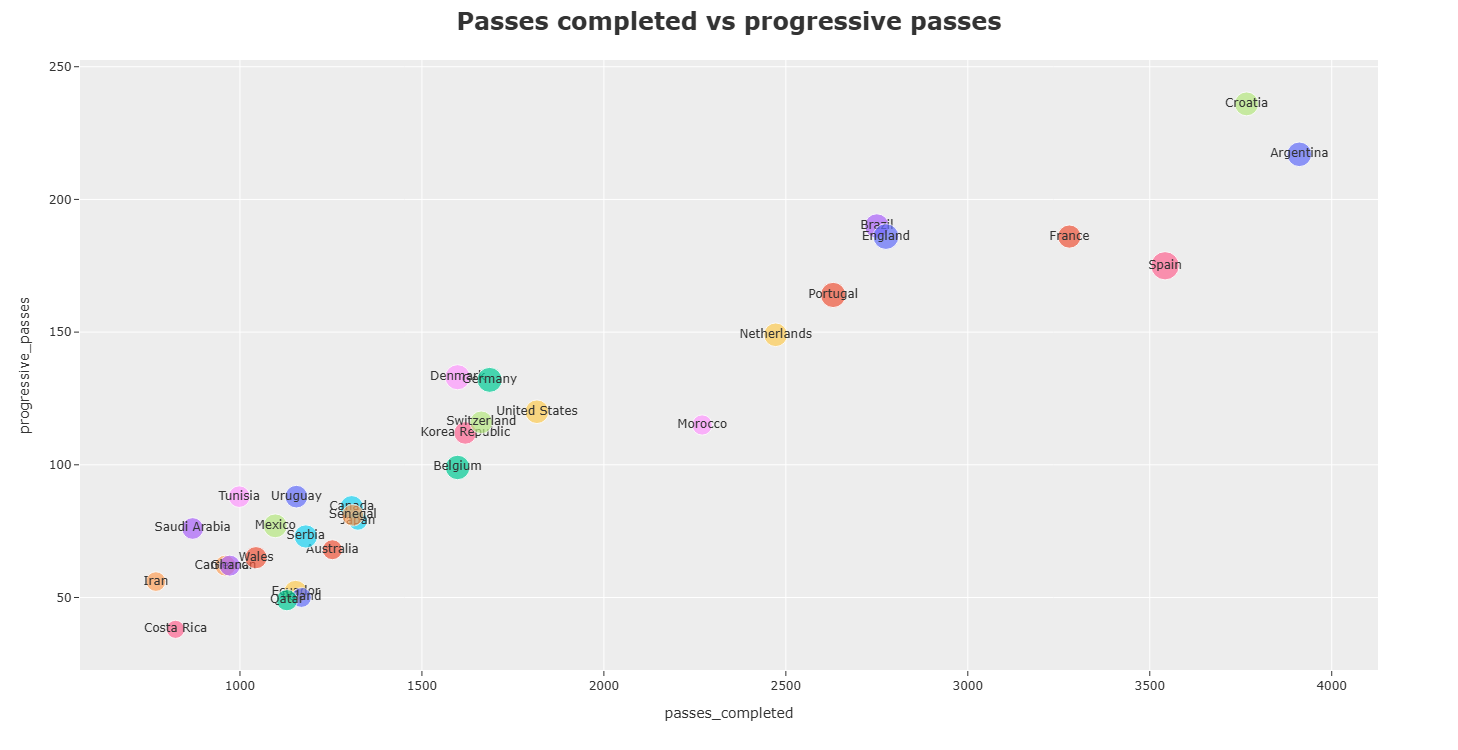

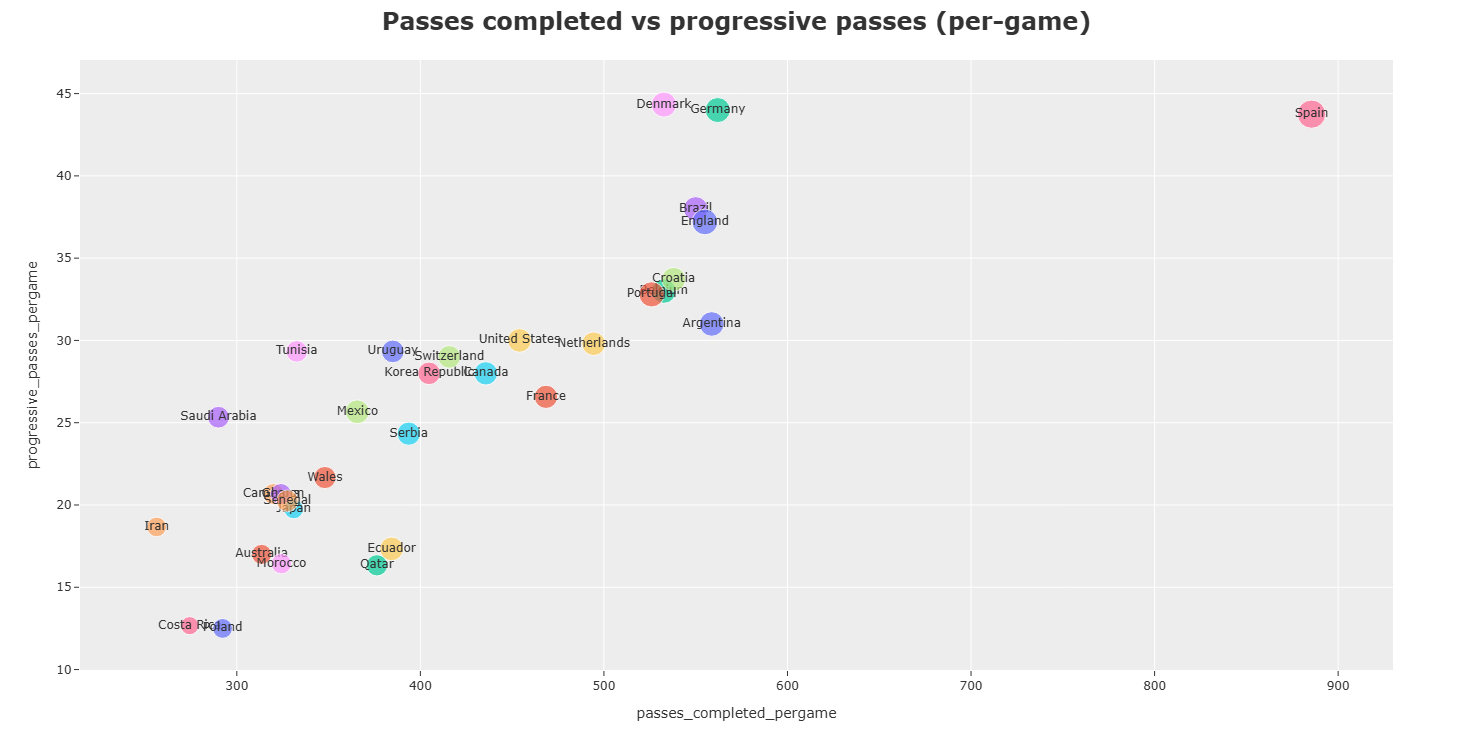

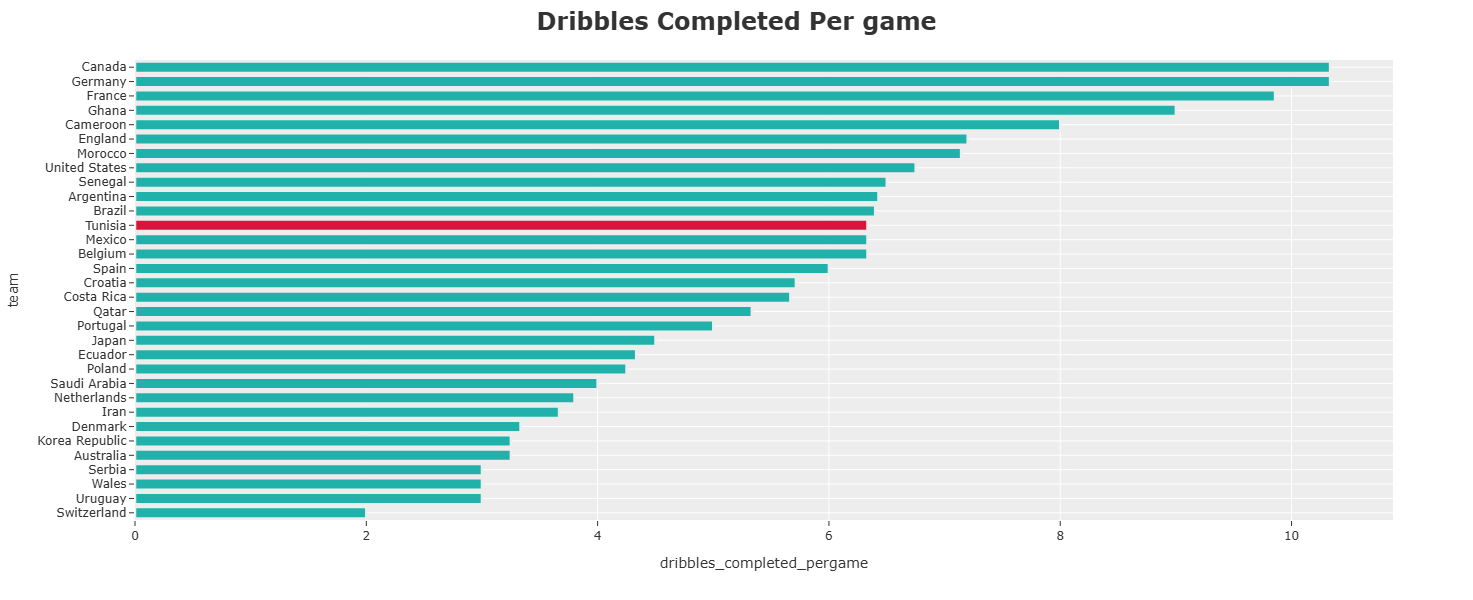

In [ ]:
team_data['shots_per_game'] = team_data['shots']/team_data['games']
team_data['shots_on_target_per_game'] = team_data['shots_on_target']/team_data['games']
team_data['npxg_per_game'] = team_data['npxg']/team_data['games']

# 1) Passes completed vs progressive passes
fig = px.scatter(
    team_data,
    x='passes_completed',
    y='progressive_passes',
    color='team',
    size='possession',
    width=850,
    height=750,
    text=team_data['team'],
)

fig.update_layout(
    showlegend=False,
    template='ggplot2',
    title_text='<b>Passes completed vs progressive passes</b>',
    title_font=dict(size=24),
)

fig.show()

# 2) Per-game version
team_data['passes_completed_pergame'] = team_data['passes_completed'] / team_data['games']
team_data['progressive_passes_pergame'] = team_data['progressive_passes'] / team_data['games']

fig = px.scatter(
    team_data,
    x='passes_completed_pergame',
    y='progressive_passes_pergame',
    color='team',
    size='possession',
    width=850,
    height=750,
    text=team_data['team'],
)

fig.update_layout(
    showlegend=False,
    template='ggplot2',
    title_text='<b>Passes completed vs progressive passes (per-game)</b>',
    title_font=dict(size=24),
)

fig.show()

# 3) Dribbles completed per game
team_data['dribbles_completed_pergame'] = team_data['dribbles_completed'] / team_data['games']

fig = px.bar(
    team_data.sort_values('dribbles_completed_pergame', ascending=True),
    y="team",
    x='dribbles_completed_pergame',
    color=None,
    width=750,
    height=600,
)

fig.update_layout(
    template='ggplot2',
    title_text="<b>Dribbles Completed Per game</b>",
    title_font=dict(size=24),
)

# If you really have 32 teams:
n_teams = team_data.shape[0]
colors = ['lightseagreen'] * n_teams
if n_teams > 20:
    colors[20] = 'crimson'

fig.update_traces(
    marker_color=colors,
    marker_line_color=None,
    marker_line_width=2.5,
)

fig.show()

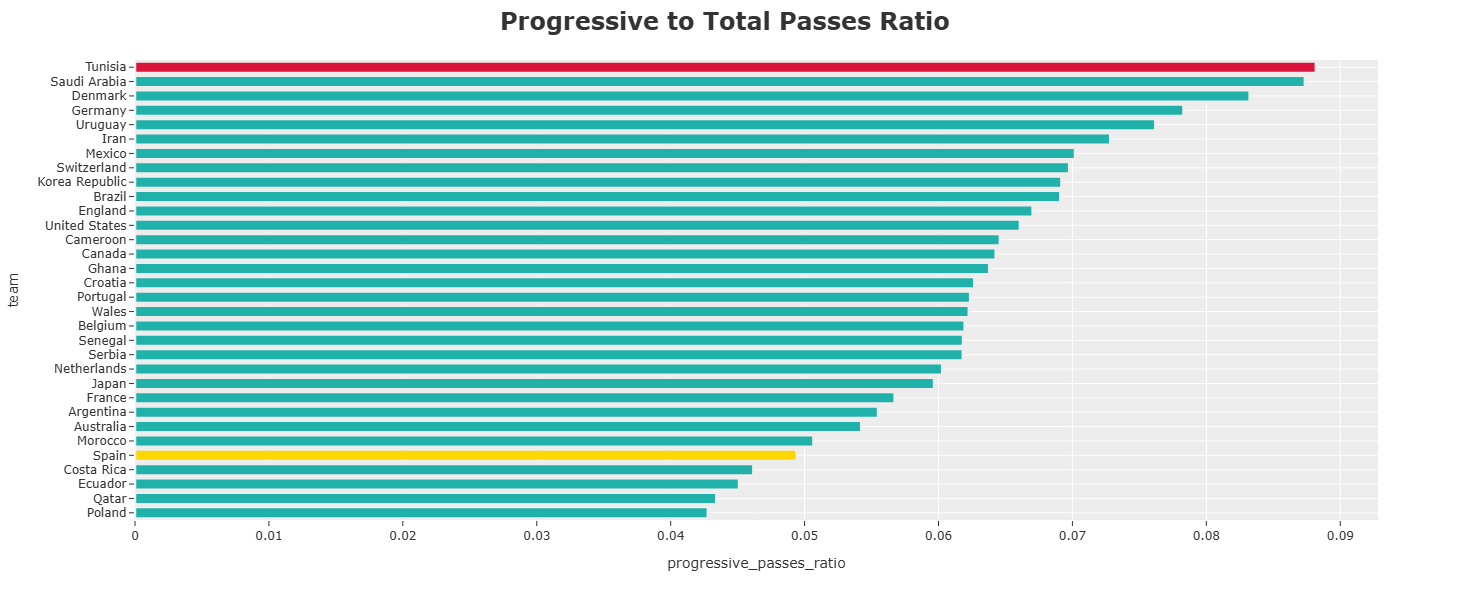

In [ ]:
team_data['progressive_passes_ratio'] = team_data['progressive_passes']/team_data['passes_completed']

fig = px.bar(team_data.sort_values('progressive_passes_ratio', ascending = True),
             y="team", x='progressive_passes_ratio',color=None,
             width=750,
             height=600,
             )

fig.update_layout(
             template='ggplot2',
             title="<b> Progressive to Total Passes Ratio  <b>",
             title_font = dict(size=24),
)

colors = ['lightseagreen',] * 32
colors[31] = 'crimson'

colors[4] = 'gold'
fig.update_traces(marker_color=colors, marker_line_color=None,
                  marker_line_width=2.5, opacity=None)
fig.show()

Spain had by far the most average ball possession (75.8%), a 13 percent more possession than the second placed team England.

Spain is also a pass master. They led by quite a margin having made more than 300 passes more than Germany per game, 2nd on the list.

On progressive passing statistics three teams stand out; Denmark, Germany and Spain. However, having failed to advance to the last-16 stage, Denmark and Germany must be wondering if they could have used their progressive passes a little more effectively.

The progressive to total pass ratio tells an interesting story. Spain's impressive ball possession and passes wasn't that effective going forward and finding key passes to score goals.

The Messi Effect:

In the graph below total passes completed vs the total distance covered by the passes is plotted. We can see that there is a linear relationship. More passes means more distance (kinda obvious). A straight line can be drawn through the dots. However, if we look closely Argentina deviates from the rest, i.e they seem to have made more short passes resulting in an overall distance a little less proportional to the total passes they have completed.

Being the play-maker of his team, it is likely that  Messi is involved in most of the passes Argentina makes. Moreover, watching his games [historically] he plays a lot of one-two's and short intricate passes. Therefore, it is safe to say that what we see here could be described as “the Messi effect”.

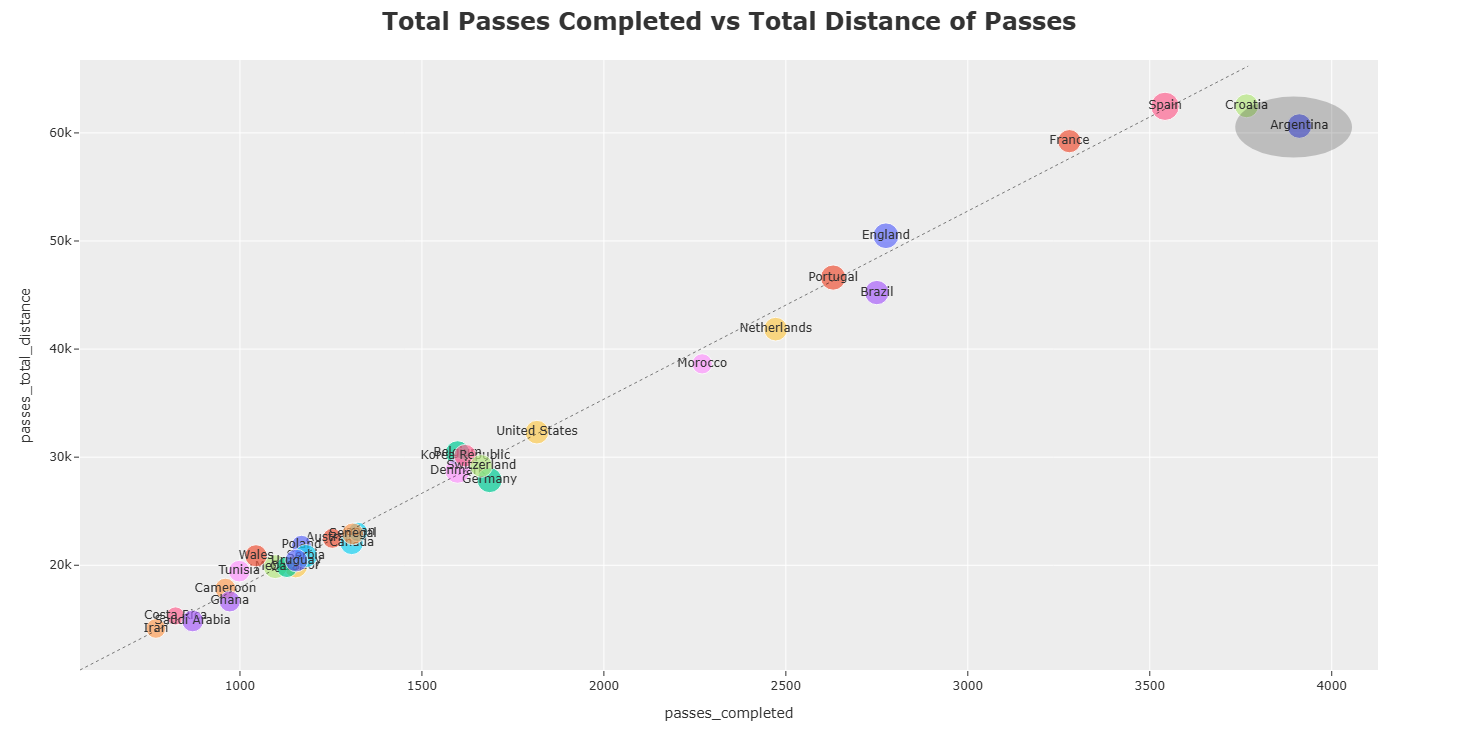

In [ ]:
fig = px.scatter(team_data,
                 x='passes_completed',
                 y='passes_total_distance',
                 color='team',
                 size='possession',
                 width=850,
                 height=750,
                 text=team_data['team']
                )

fig.add_shape(
    type="line", line_color="black", line_width=0.5, opacity=1, line_dash="dot",
    y0=0, y1=0.99, yref="paper", x0=0, x1=0.9, xref="paper",
)

fig.add_shape(type="circle",
    xref="paper", yref="paper",
    fillcolor=None,opacity=0.2,
    x0=.89, y0=.84, x1=0.98, y1=0.94,
    line_color="black",
)

fig.update_layout(showlegend=False, title='<b> Total Passes Completed vs Total Distance of Passes <b>', template='ggplot2', title_font = dict(size=24))
fig.show()

In [ ]:
from tabulate import tabulate

team_data['avg_dist_per_pass'] = np.round(team_data['passes_total_distance']/team_data['passes_completed'], 2)
df= team_data.loc[:, ['team', 'avg_dist_per_pass']].sort_values(by='avg_dist_per_pass', ascending=True)

print('Average Passing Distance Statistics')
print(tabulate(df.describe()[:], tablefmt = 'psql'))

print('Average Passing Distance (m)')
print(tabulate(df, tablefmt = 'psql'))

Average Passing Distance Statistics
+-------+----------+
| count | 32       |
| mean  | 17.7369  |
| std   |  0.92504 |
| min   | 15.5     |
| 25%   | 17.1125  |
| 50%   | 17.67    |
| 75%   | 18.2425  |
| max   | 19.99    |
+-------+----------+
Average Passing Distance (m)
+----+----------------+-------+
|  0 | Argentina      | 15.5  |
|  3 | Brazil         | 16.45 |
| 12 | Germany        | 16.53 |
|  7 | Croatia        | 16.6  |
|  5 | Canada         | 16.88 |
| 19 | Netherlands    | 16.93 |
| 18 | Morocco        | 17.02 |
| 23 | Saudi Arabia   | 17.06 |
| 13 | Ghana          | 17.13 |
|  9 | Ecuador        | 17.28 |
| 15 | Japan          | 17.43 |
| 24 | Senegal        | 17.48 |
| 27 | Switzerland    | 17.55 |
| 22 | Qatar          | 17.58 |
| 26 | Spain          | 17.63 |
| 25 | Serbia         | 17.65 |
| 30 | Uruguay        | 17.69 |
| 21 | Portugal       | 17.72 |
| 29 | United States  | 17.79 |
|  1 | Australia      | 17.93 |
|  8 | Denmark        | 17.99 |
| 11 | France        

The following table confirms that Argentina is indeed the team which averaged the shortest pass-distance, 15.5m per pass. The overall average is 17.7m and the highest is almost 20m and 19.5 recorded by teams Wales and Tunisia

**Touches**

---


Touches is defined as the sum of all events where a player touches the ball excluding things like Aerial Duel lost or Challenge lost. Knowing on which area of the pitch those touches are occurring help us identify which teams are attack minded which are not. Since the majority of the game is contested in the middle of the park, perhaps the attacking third and the defensive third are more important to know. A football pitch has three zones; the defensive third, the middle third and the attacking third. The following picture shows the three zones of the pitch (blue line is the direction of play).

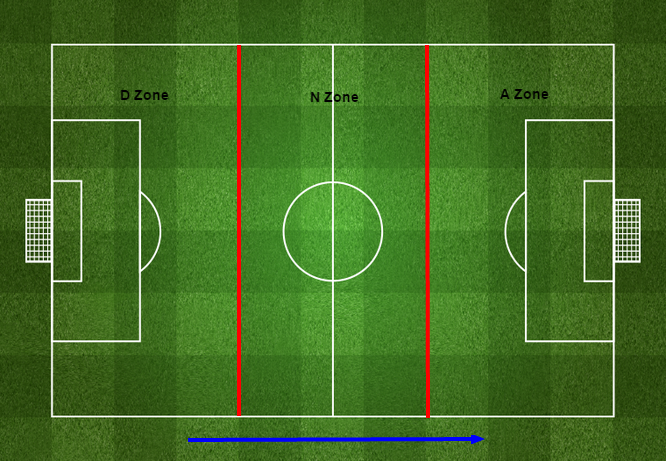

KEY: D Zone => defensive third; N Zone => Neutral Zone (middle third) and A Zone => Attacking third

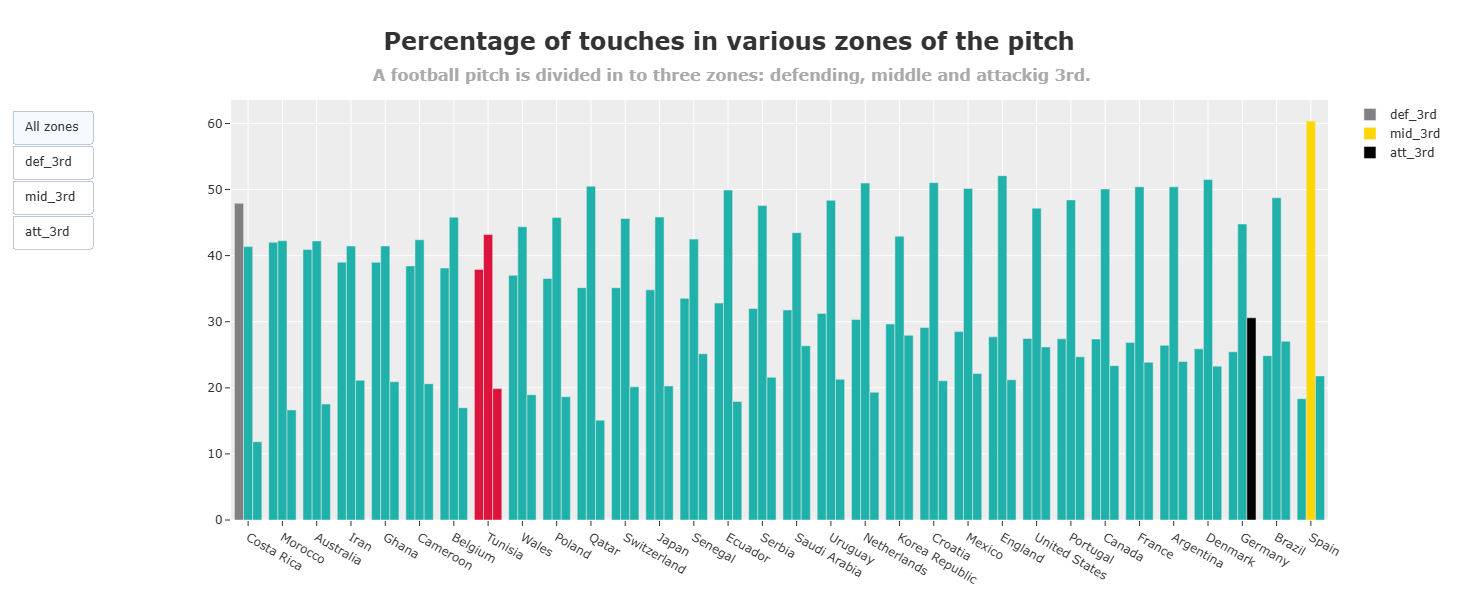

In [ ]:
team_data['touches_def_pen_area_percent'] = team_data['touches_def_pen_area']/team_data['touches']*100
team_data['touches_def_3rd_percent'] = team_data['touches_def_3rd']/team_data['touches']*100
team_data['touches_mid_3rd_percent'] = team_data['touches_mid_3rd']/team_data['touches']*100
team_data['touches_att_3rd_percent'] = team_data['touches_att_3rd']/team_data['touches']*100
team_data['touches_att_pen_area_percent'] = team_data['touches_att_pen_area']/team_data['touches']*100

df1= team_data[['team', 'touches_def_3rd_percent']].sort_values('touches_def_3rd_percent', ascending=False)
df2= team_data[['team', 'touches_mid_3rd_percent']].sort_values('touches_mid_3rd_percent', ascending=False)
df3= team_data[['team', 'touches_att_3rd_percent']].sort_values('touches_att_3rd_percent', ascending=False)


colors = ['lightseagreen',] * 32
colors[7] = 'crimson'
colors[0] = 'gray'

colors1 = ['lightseagreen',] * 32
colors1[23] = 'crimson'
colors1[0] = 'gold'

colors2 = ['lightseagreen',] * 32
colors2[22] = 'crimson'
colors2[0] = 'black'


fig = go.Figure(data=
                 [go.Bar(
                     name='def_3rd',
                     y=df1['touches_def_3rd_percent'],
                     x=df1["team"],
                     marker_color= colors,
                     ),
                  go.Bar(
                      name='mid_3rd',
                      y=df2['touches_mid_3rd_percent'],
                      x=df2['team'],
                      marker_color= colors1 ,
                      ),
                  go.Bar(
                      name='att_3rd',
                      y=df3['touches_att_3rd_percent'],
                      x=df3['team'],
                      marker_color= colors2 ,
                      ),
                  ]
                 )

# dropdown buttons

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="down",

            pad={"r": 10, "t": 10},
            showactive=True,
            x=-0.2,
            xanchor="left",
            y=1.0,
            yanchor="top",

            buttons=list([
                dict(label="All zones",
                    method="update",
                    args=[{"visible": [True, True, True]},
                        {"title": "Number of touches: Full zones of the pitch."}]),
                dict(label="def_3rd",
                    method="update",
                    args=[{"visible": [True, False, False]},
                        {"title": "Number of touches: Defensive 3rd of the Pitch"\
                         '<br><span style="font-size:16px; color: darkgray"> Costa Rica, with ~48% touces in the defensive 3rd of the pitch are the most defensive team.',
                            },
                         {"markercolor": colors}]),
                dict(label="mid_3rd",
                    method="update",
                    args=[{"visible": [False, True, False]},
                        {"title": "Number of touches: Middle 3rd of the Pitch"\
                         '<br><span style="font-size:16px; color: darkgray"> With ~60% touces, Spain enjoyed most of their touches in the middle of the pitch!',
                            }]),
                dict(label="att_3rd",
                    method="update",
                    args=[{"visible": [False, False, True]},
                        {"title": "Number of touches: Attacking 3rd of the Pitch"\
                         '<br><span style="font-size:16px; color: darkgray"> Germany is the only team which had touched the ball more than 30% in the attackig 3rd.',
                            }]),
            ]),
        )
    ])

fig.update_layout(
             template='ggplot2',
             title="<b> Percentage of touches in various zones of the pitch <b>"\
                         '<br><span style="font-size:16px; color: darkgray"> A football pitch is divided in to three zones: defending, middle and attackig 3rd.',
             title_font = dict(size=24),
             width=1000,
             height=600,
)


Costa Rica is the defensive team of all with ~48% of their touches happening in the defensive third (Argentina and France have made 26.4% and 26.9% touches in the middle respectively).
Spain loves the neutral zone. 60.4% of their touches are happening there (Argentina and France have made 50.4% touches in the middle)
Germany are the most attacking team with 31% of their touches occuring in the attacking third of the pitch (Argentina and France have made ~24% touches in the final third).
Tunisia is firmly on the defensive side having ranked 8 in the defensive third touches and 10 from the bottom in terms of touches in the attacking third.

**A case for Tunisia**

---
**Do not concede goals!**

Football is a simple game. Pass pass pass...score more goals than your opponent and you win! But in a tournament football not conceding goals is equally important.



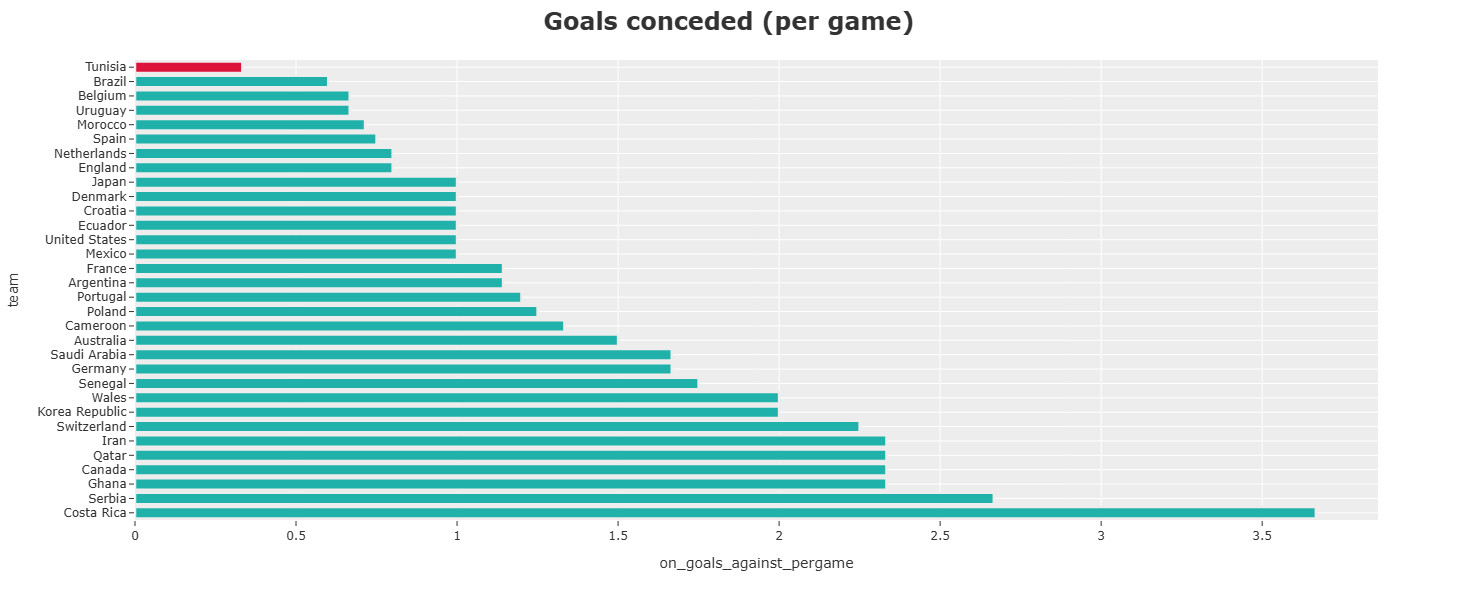

In [ ]:
team_data['on_goals_against_pergame'] = team_data['on_goals_against']/team_data['games']

fig = px.bar(team_data.sort_values('on_goals_against_pergame', ascending = False),
             y="team", x="on_goals_against_pergame",color=None,
             width=750,
             height=600,
             )
fig.update_layout(
             template='ggplot2',
             title="<b> Goals conceded (per game) <b>",
            title_font = dict(size=24),
)

colors = ['lightseagreen'] * 32
colors[31] = 'crimson'


fig.update_traces(marker_color=colors, marker_line_color=None,
                  marker_line_width=2.5, opacity=None)
fig.show()

**Blocked Passes/Shots**

---
A blocked shot is defined as any clear attempt to score that:

Is going on target and is blocked by an outfield player, where there are other defenders or a goalkeeper behind the blocker.

Includes shots blocked unintentionally by the shooter’s own team mate.


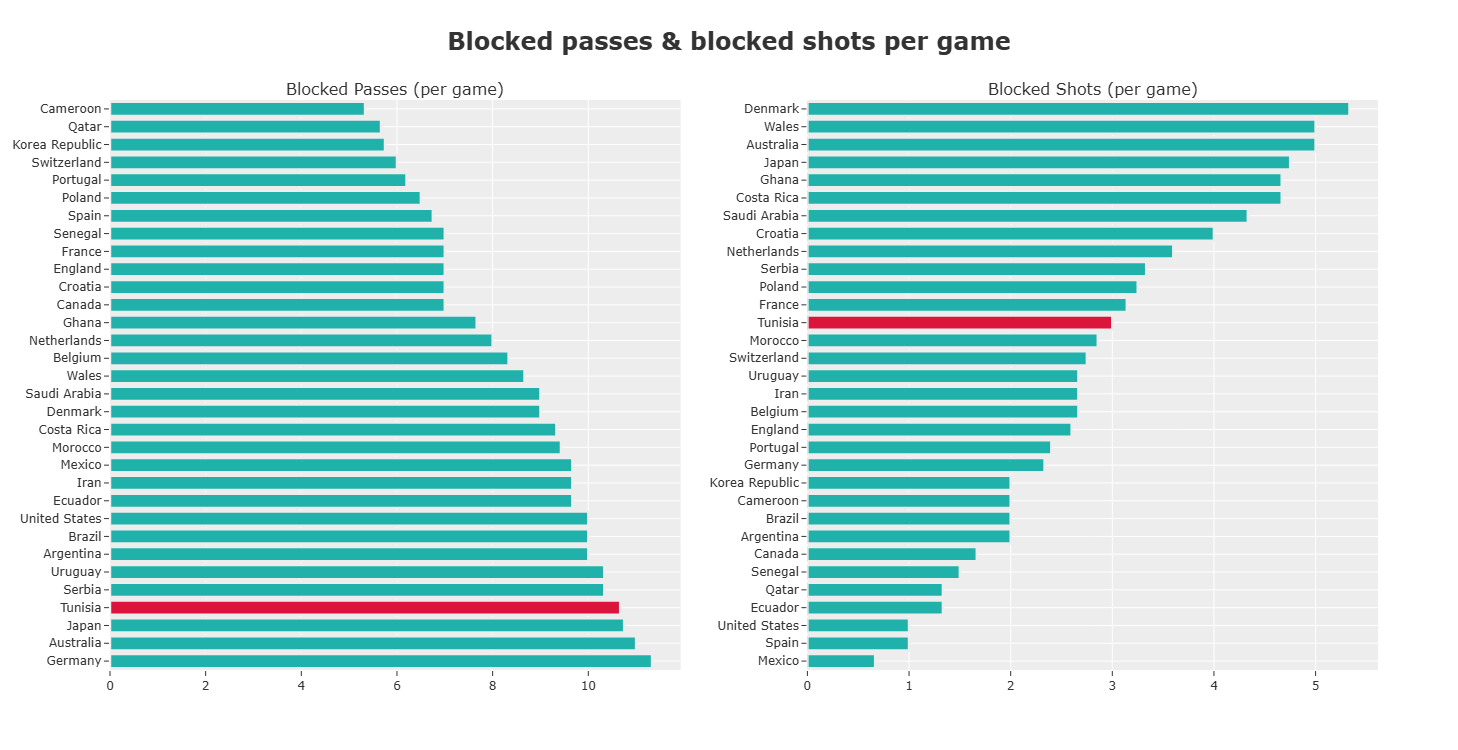

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

team_data['blocked_passes_pergame'] = team_data['blocked_passes'] / team_data['games']
team_data['blocked_shots_pergame'] = team_data['blocked_shots'] / team_data['games']

fig = make_subplots(
    rows=1,
    cols=2,
    specs=[[{}, {}]],
    subplot_titles=('Blocked Passes (per game)', 'Blocked Shots (per game)')
)

# Left subplot: blocked passes
fig.add_trace(
    go.Bar(
        x=team_data['blocked_passes_pergame'],
        y=team_data['team'],
        orientation='h',
        showlegend=False
    ),
    row=1,
    col=1
)

# Right subplot: blocked shots
fig.add_trace(
    go.Bar(
        x=team_data['blocked_shots_pergame'],
        y=team_data['team'],
        orientation='h',
        showlegend=False
    ),
    row=1,
    col=2
)

# Colors (use dynamic length instead of hard-coded 32)
n_teams = team_data.shape[0]
colors = ['lightseagreen'] * n_teams
if n_teams > 28:
    colors[28] = 'crimson'   # highlight one team

# Apply colors separately to each subplot's bars
fig.update_traces(
    marker_color=colors,
    marker_line_color=None,
    marker_line_width=2.5,
    opacity=None,
    row=1,
    col=1
)
fig.update_traces(
    marker_color=colors,
    marker_line_color=None,
    marker_line_width=2.5,
    opacity=None,
    row=1,
    col=2
)

# Sort y-axis categories separately for each subplot
fig.update_yaxes(
    categoryorder='total descending',
    row=1,
    col=1
)
fig.update_yaxes(
    categoryorder='total ascending',
    row=1,
    col=2
)

fig.update_layout(
    height=750,
    width=1100,
    template='ggplot2',
    title_text="<b>Blocked passes & blocked shots per game</b>",
    title_font=dict(size=24),
)

fig.show()

Tunisia stat on both of these metrics is respectable (above average).

**Recoveries&Interceptions**

---
Ball Recovery: This is where a player recovers the ball in a situation where neither team has possession or where the ball has been played directly to him by an opponent, thus securing possession for their team.

Interception: This is where a player reads an opponent’s pass and intercepts the ball by moving into the line of the intended pass.


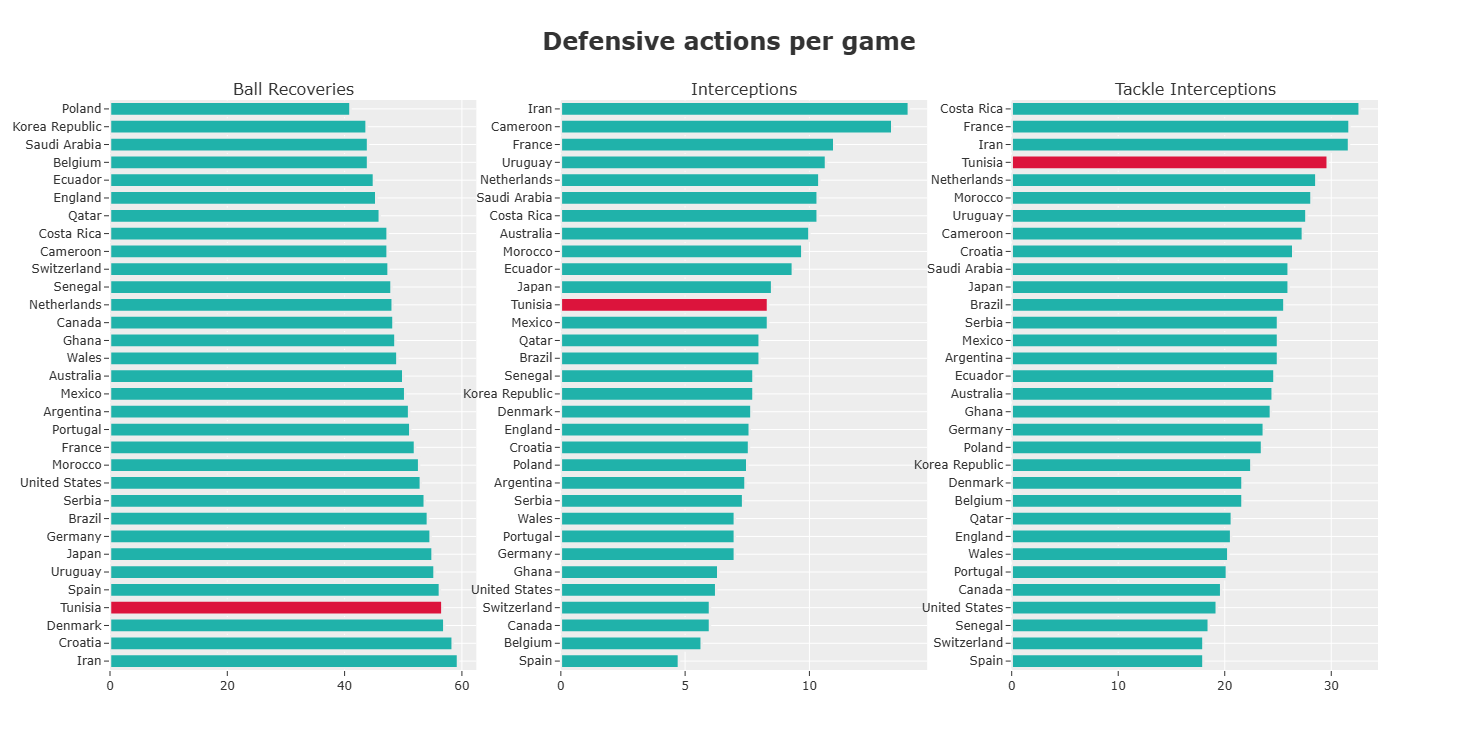

In [ ]:
team_data['ball_recoveries_pergame'] = team_data['ball_recoveries'] / team_data['games']
team_data['interceptions_pergame'] = team_data['interceptions'] / team_data['games']
team_data['tackles_interceptions_pergame'] = team_data['tackles_interceptions'] / team_data['games']

fig = make_subplots(
    rows=1,
    cols=3,
    specs=[[{}, {}, {}]],
    subplot_titles=('Ball Recoveries', 'Interceptions', 'Tackle Interceptions')

)

# 1) Ball recoveries
fig.add_trace(
    go.Bar(
        x=team_data['ball_recoveries_pergame'],
        y=team_data['team'],
        orientation='h',
        showlegend=False
    ),
    row=1,
    col=1
)

# 2) Interceptions
fig.add_trace(
    go.Bar(
        x=team_data['interceptions_pergame'],
        y=team_data['team'],
        orientation='h',
        showlegend=False
    ),
    row=1,
    col=2
)

# 3) Tackles + interceptions
fig.add_trace(
    go.Bar(
        x=team_data['tackles_interceptions_pergame'],
        y=team_data['team'],
        orientation='h',
        showlegend=False
    ),
    row=1,
    col=3
)

# Dynamic colors based on number of teams
n_teams = team_data.shape[0]
colors = ['lightseagreen'] * n_teams
if n_teams > 28:
    colors[28] = 'crimson'   # highlight one team if it exists

# Apply colors to all bar traces
fig.update_traces(
    marker_color=colors,
    marker_line_color=None,
    marker_line_width=2.5,
    opacity=None,
)

# Sort y-axis categories separately for each subplot
fig.update_yaxes(
    categoryorder='total descending',
    row=1,
    col=1
)
fig.update_yaxes(
    categoryorder='total ascending',
    row=1,
    col=2
)
fig.update_yaxes(
    categoryorder='total ascending',
    row=1,
    col=3
)

fig.update_layout(
    height=750,
    width=1300,
    template='ggplot2',
    title_text="<b>Defensive actions per game</b>",
    title_font=dict(size=24),
)

fig.show()

We can see that this aspect of the game is also well executed by Tunisia in comparision to the rest of the teams competing at the world cup.

**Clearances**

---
This is a defensive action where a player kicks the ball away from his own goal with no intended recipient


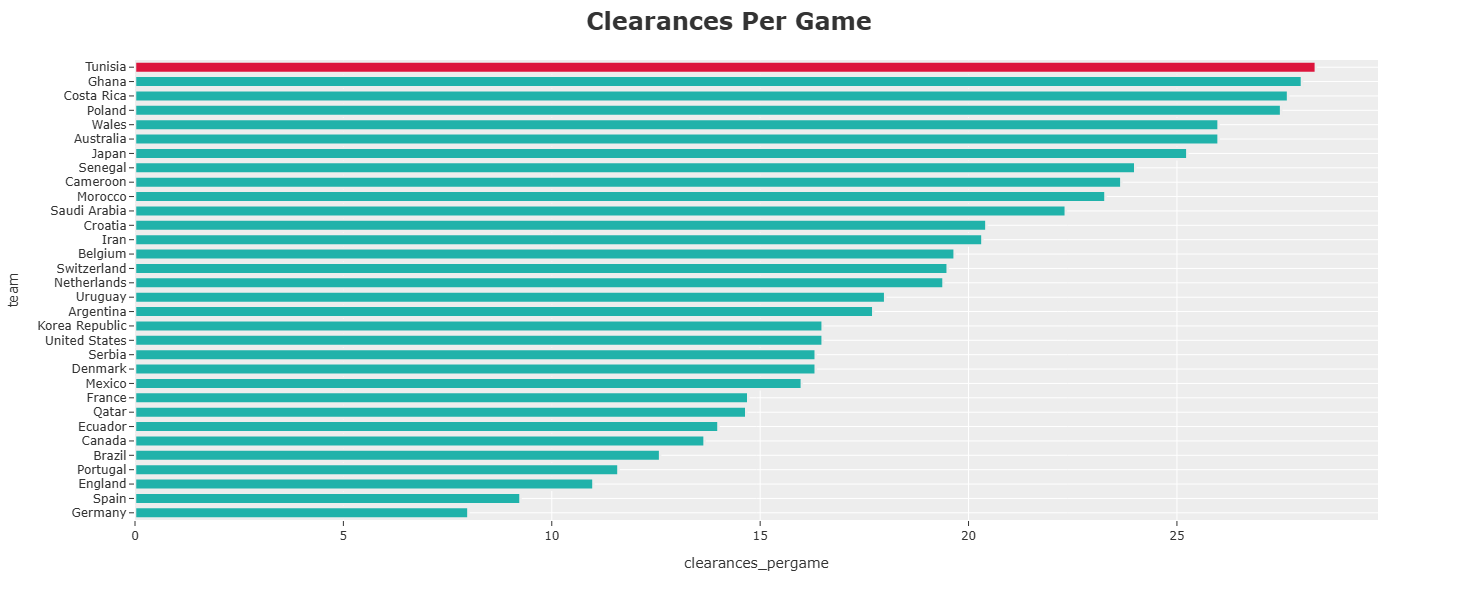

In [ ]:
team_data['clearances_pergame'] = team_data['clearances']/team_data['games']

fig = px.bar(team_data.sort_values('clearances_pergame', ascending = True),
             y="team", x="clearances_pergame",color=None,
             width=750,
             height=600,
             )
fig.update_layout(
             template='ggplot2',
             title="<b> Clearances Per Game <b>",
             title_font=dict(size=24),
)

colors = ['lightseagreen',] * 32
colors[31] = 'crimson'

fig.update_traces(marker_color=colors, marker_line_color=None,
                  marker_line_width=2.5, opacity=None)
fig.show()

Booting it out of the danger zone when necessary is also a good strategy. It relieves the pressure from the defense line and gives a breather and time to reorganize the defensive unit. **Tunisia** leads the way in this aspect of the game. They know how to clear the danger so it appears.

---

**Possessions Lost**

If a team loses possession every now and then chances are high that they will be exposed to counter attacks (especially if they lost it in the final third of the pitch) and that might end up leading to a goal and hence higher chances of losing the game

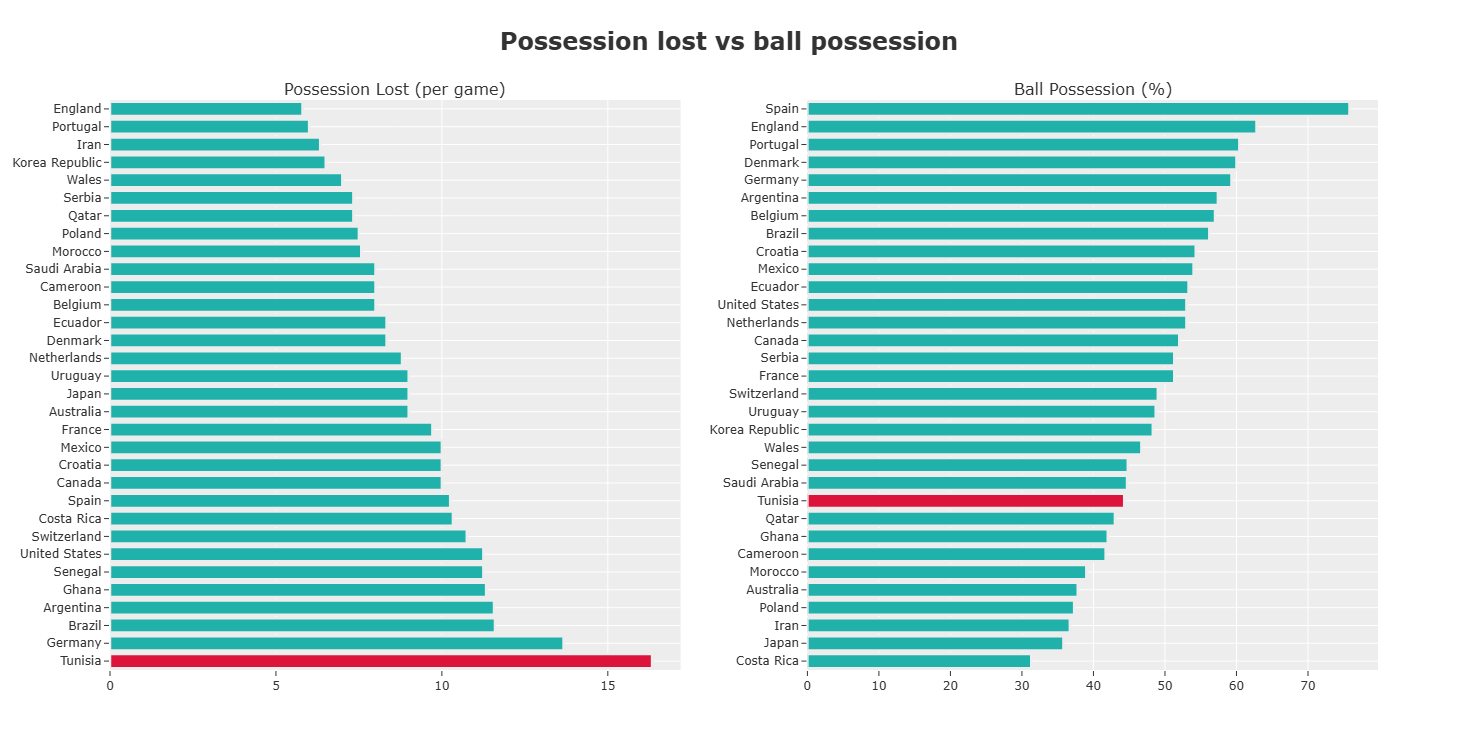

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

team_data['dispossessed_pergame'] = team_data['dispossessed'] / team_data['games']

fig = make_subplots(
    rows=1,
    cols=2,
    specs=[[{}, {}]],
    subplot_titles=('Possession Lost (per game)', 'Ball Possession (%)')

)

# Left subplot: possession lost
fig.add_trace(
    go.Bar(
        x=team_data['dispossessed_pergame'],
        y=team_data['team'],
        orientation='h',
        showlegend=False
    ),
    row=1,
    col=1
)

# Right subplot: ball possession
fig.add_trace(
    go.Bar(
        x=team_data['possession'],
        y=team_data['team'],
        orientation='h',
        showlegend=False
    ),
    row=1,
    col=2
)

# Dynamic colors based on number of teams
n_teams = team_data.shape[0]
colors = ['lightseagreen'] * n_teams
if n_teams > 28:
    colors[28] = 'crimson'   # highlight a specific team if it exists

# Apply colors to both subplots
fig.update_traces(
    marker_color=colors,
    marker_line_color=None,
    marker_line_width=2.5,
    opacity=None,
)

# Sort y-axis categories per subplot
fig.update_yaxes(
    categoryorder='total descending',
    row=1,
    col=1
)
fig.update_yaxes(
    categoryorder='total ascending',
    row=1,
    col=2
)

fig.update_layout(
    height=750,
    width=1100,
    template='ggplot2',
    title_text="<b>Possession lost vs ball possession</b>",
    title_font=dict(size=24),
)

fig.show()


 We see that Tunisia is a team that lose position that much the highest and low ball possession

 Thank you for reading my notebook!